Buen dia, tardes, noches. Aca les dejamos el mejor trabajo practico de la cursada 2025. Esperamos que lo disfruten y vean el avance de 3 futuros Data Analyst.

Primero que nada, vamos a instalar las dependencias.

In [4]:
import pandas as pd
import re

dataset = pd.read_csv("arbolado-publico-lineal-2017-2018.csv")

/var/folders/r5/t14bq5_90_s4lb_1fs0ym75c0000gn/T/ipykernel_8998/858467559.py:4: DtypeWarning: Columns (2,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("arbolado-publico-lineal-2017-2018.csv")


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370180 entries, 0 to 370179
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   long                   354838 non-null  float64
 1   lat                    354838 non-null  float64
 2   nro_registro           370180 non-null  object 
 3   tipo_activ             370180 non-null  object 
 4   comuna                 370180 non-null  int64  
 5   manzana                224140 non-null  object 
 6   calle_nombre           370087 non-null  object 
 7   calle_altura           364677 non-null  object 
 8   calle_chapa            363721 non-null  object 
 9   direccion_normalizada  355941 non-null  object 
 10  ubicacion              361884 non-null  object 
 11  nombre_cientifico      370180 non-null  object 
 12  ancho_acera            367083 non-null  object 
 13  estado_plantera        370180 non-null  object 
 14  ubicacion_plantera     368776 non-nu

long	(cuantitativa continua):	Longitud geográfica (X coordinate) donde se encuentra el árbol. (15342 nan)

lat	(cuantitativa continua):	Latitud geográfica (Y coordinate) donde se encuentra el árbol. (15342 nan)
cuando long es nan, long tambien

nro_registro	(cuantitativa discreta):	Número de registro único del árbol en el sistema. (es como el id del arbol) (0 nan, esta bien escrito, pasarlo a entero por si queremos operar con esta columna)

tipo_activ	(cualitativa ordinal):	Tipo de actividad o clasificación del árbol (e.g., 'Lineal'). (se refiere al crecimiento en altura o longitud del arbol) (0 nan) (todas las que dicen 'calle' son de la comuna 10 y de la misma manzana 614)
(podemos pasarlo a binario para trabajarlo mas facil)

comuna	(cuantitativa discreta):	Número de la comuna donde se encuentra el árbol. (o nan toma valores del 1 al 15, bien!)

manzana	(cuantitativa discreta)	Identificador de la manzana donde se encuentra el árbol. (146040 nan --> 40% del total de los datos!! tener mucho cuidado porque si eliminamos perdemos varios registros) (no sabemos que hacer con los nulos pero podemos hacer un OHE para saber si es bis o no la manzana) (si es bis puede aparecer como b, bis, BIS, y, entre otras muchas formas que vamos a encontrar)

calle_nombre	(cualitativa ordinal)	Nombre de la calle donde se encuentra ubicado el árbol. (93 nan --> candidato a eliminar, en estas filas nulas casi todos los datos de ubicacion son nulos)

calle_altura	(cuantitativa discreta)	Altura de la calle donde se encuentra el árbol.

calle_chapa	(cuantitativa discreta)	Número de chapa de la calle más cercano al árbol.

(si calle chapa es nan --> fijarse la calle altura) (posible solicion? unir las dos columnas y si chapa es nan ponemos el valor de calle_altura) (pasarlo a entero) (no es necesaria para algun estudio pero puede ser necesaria para tomar alguna accion)

direccion_normalizada	(dato no estructurado)	Dirección normalizada para la ubicación del árbol (e.g., 'ESMERALDA 1120'). (observar porque es un dato derivado, te vamos a eliminar, preparate...)

ubicacion	(cualitativa nominal): Información adicional sobre la ubicación del árbol (e.g., 'Exacta').
(si es nan se puede salvar si hay calle_chapa, nos tenemos que fijar si es enfrente o exacta)
(si la calle chapa es par, estamos en el lado derecho; si es impar, lado izquierdo)
(puede ser que si ubicacion es nan, podemos ver estado_plantera y la chapa para directamente tomar la decicion de decir que la planta esta en el lado izquierdo o derecho)
(vamos a pre procesar la columna para que solo quede lado izquierdo o derecho)

nombre_cientifico	(cualitativa nominal): Nombre científico de la especie del árbol. (0 nan, la x representa que la planta es un hibrido entre las dos especies) (identificamos que hay arboles que no estan identificados con el valor 'no identificado') (9400 no identificados) (341 tipos de nombres, ver posibles soluciones para tomar decisiones, preguntar?)

ancho_acera (cuantitiva continua): Ancho de la acera donde está ubicado el árbol,
en metros. (podemos pasar a float) (son 3100 nan, si vamos a plantear hipotesis que usen el valor del ancho de la vereda, necesitamos tomar una decision de si eliminar o no los valores nan) (hay medidas que son medias rari, mayores a 5 metros) (las mediciones de ancho de vereda muy grandes son muy poco frecuentes, prestar atencion)

estado_plantera (cualitativa ordinal): Estado de la plantación (e.g., 'Ocupada').
(cerrada, vacia, subocupada, ocupada, sobreocupada, estos son los valores que toma la variable cuando hagamos la limpieza)

ubicacion_plantera (cualitativa nominal): Condición de la ubicación de la plantación (e.g., 'Regular'). (acomodar regular, pasarlo todo a minuscula)
(ochava, fuera de linea (/ochava ver donde va), regular, ocupada, cantero grande, O (puede ser ochava u ocupada), elevada, la O y o ver si es ochava o ocupada) (ubicacion plantera nan, nivel nan) (hay un elevado que debe ser de nivel)

nivel_plantera	(cualitativa ordinal):	Nivel de la plantación respecto al suelo (e.g., 'A nivel, Elevada'). (elevada, a nivel, bajo nivel, reducida) (observacion: no tiene plantera definida) (hay una ochava que debe ser de la ubicacion)

diametro_altura_pecho	(cuantitativa discreta):	Diámetro del árbol a la altura del pecho, en centímetros. (188 valores diferentes) (decidir que hacer con los nan porque es una variable que nos sirve mucho)

altura_arbol	(cuantitativa discreta):	Altura del árbol en metros. (4300 nan) (decidir que hacer con los nan y ya estan para laburar)

**Las hipotesis que planteamos son:**

**Univariadas:**

  **1. La mayoría de las planteras de la Ciudad de Buenos Aires se encuentran “ocupadas” o “sobreocupadas”, lo que indica una alta presión sobre el arbolado urbano existente.**

  Datos requeridos: estado_plantera
  Serviría para planificar nuevas plantaciones o reemplazos.

  **2. Algunas especies dominan el arbolado urbano de Buenos Aires, causando alergia, como el plátano de sombra.**

Datos requeridos: nombre_cientifico

  **3. La distribución del arbolado urbano en la Ciudad Autónoma de Buenos Aires no es equitativa entre comunas, algunas presentan una mayor concentración de árboles que otras.**

  Datos requeridos: comuna

**Bivariadas:**

  **1. Algunas comunas tienen desbalance, con pocas especies “eficientes” frente a especies de menor rendimiento ambiental.**

Datos requeridos: nombre_cientifico, comuna.

  Eucalipto, Jacaranda mimosifolia, Melia azedarach, Ulmus spp., Quercus spp.

Conclusión: Sugerir reforestaciones focalizadas por comuna.


  **2.En comunas con mayor proporción de especies dominantes (menos diversidad) el diámetro promedio de los árboles es menor que en comunas con mayor diversidad de especies.**

Datos requeridos: nombre_cientifico, diametro_altura_pecho.

Resultado: Ver si la dominancia de pocas especies afecta el crecimiento (y por tanto el valor ambiental) de la masa arbórea.

**Multivariadas:**

**1. Arboles de mayor tamaño concentran más en ciertas comunas (zonas residenciales con veredas grandes) que en zonas más densas.**

Datos requeridos: diametro_altura_pecho, altura_arbol, comuna.

Comuna 2 → Recoleta

Comuna 14 → Palermo

Comuna 12 → Saavedra, Villa Urquiza, Villa Pueyrredón, Coghlan

Comuna 13 → Núñez, Belgrano, Colegiales

Resultado: descubrir desigualdades en “calidad de arbolado”.

**Ahora vamos a limpiar las filas: Manzana, estado_plantera, nivel_plantera, tipo_activ**

In [6]:
dataset_limpio = dataset.copy()
dataset_limpio.head()

,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol
0,-58.378563,-34.594902,26779,Lineal,1,NaN,Esmeralda,1000.0,1120.0,ESMERALDA 1120,NaN,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0
1,-58.381532,-34.592319,30887,Lineal,1,NaN,Pellegrini Carlos,1300.0,1345.0,"PELLEGRINI, CARLOS 1345",Exacta,Peltophorum dubium,4.5,Ocupada,Regular,Elevada,6.0,5.0
2,-58.379103,-34.591939,30904,Lineal,1,NaN,Arroyo,800.0,848.0,ARROYO 848,Exacta,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,7.0,6.0
3,-58.380710,-34.591548,31336,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LD,Fraxinus pennsylvanica,NaN,Ocupada,Regular,A nivel,9.0,29.0
4,-58.380710,-34.591548,31337,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LA,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,13.0,8.0


Vamos a eliminar los null de long (15342 / 370180 = 0.041 == 4,14%) y lat (15342 / 370180 = 0.041 == 4,14%) ya que cuando son null, y cuando son ambos son null, no hay ningun dato sobre su ubicacion, siendo esto algo que no nos sirve para nuestra investigacion.

In [7]:
dataset_limpio = dataset_limpio.dropna(subset=['long'])

dataset_limpio['long'].isna().value_counts()


long
False    354838
Name: count, dtype: int64

Ahora nos quedo un dataset de 354838 observaciones

Vamos a limpiar la columna 'tipo_activ' que tiene valores como: Lineal, LINEAL, lineal, calle. Dejando solo lineal y calle.

1.   Elemento de lista
2.   Elemento de lista



In [8]:
dataset_limpio['tipo_activ'] = dataset_limpio['tipo_activ'].str.lower().str.strip()
dataset_limpio['tipo_activ'].value_counts()

tipo_activ
lineal    354805
calle         33
Name: count, dtype: int64

Ahora vamos a limpiar la columna 'manzana' que tiene valores como: 637c 384b. Decidimos crear una nueva columna llamada 'manzana_partida' para saber si la manzana fue partida, es decir, que tenga una letra. Luego limpiamos la columna 'manzana' para que quede solo los numericos. En base a ellos luego podemos plantear hipotesis si las manzanas partidas tienen menor ancho de acera.

In [9]:
import pandas as pd
import re
import numpy as np

# Reemplazamos la observacion "No corresponde" por NaN
dataset_limpio['manzana'] = dataset_limpio['manzana'].replace('No corresponde', np.nan)

# Creamos la columna 'manzana_partida' a partir de las letras de 'manzana'
dataset_limpio['manzana_partida'] = dataset_limpio['manzana'].apply(
    lambda x: 1 if pd.notna(x) and re.search(r'[A-Za-z]', str(x)) else 0
)

# Eliminamos todo lo que no sea número en 'manzana'
dataset_limpio['manzana'] = dataset_limpio['manzana'].apply(
    lambda x: re.sub(r'[^0-9]', '', str(x)) if pd.notna(x) else np.nan
)

# Convertimos a número entero
dataset_limpio['manzana'] = pd.to_numeric(dataset_limpio['manzana'], errors='coerce').astype('Int64')

# Mostrar resultados
print(dataset_limpio[['manzana', 'manzana_partida']].value_counts())
print(dataset_limpio['manzana_partida'].value_counts())
print(dataset_limpio['manzana'].isna().sum())


manzana   manzana_partida
568       0                  570
948       0                  449
16        0                  410
467       0                  407
302       0                  394
                            ... 
2         1                    1
2900      0                    1
2360      0                    1
3065      0                    1
30699877  0                    1
Name: count, Length: 1494, dtype: int64
manzana_partida
0    342244
1     12594
Name: count, dtype: int64
140650


Ahora vamos por 'ubicacion'. Pasamos a mayusculas, sacamos los espacios y dejamos 4 grupos, suponiendo que enfrente-exacta es una de las dos opciones, y asi fuimos tomando las decisiones. Aunque, en conjunto, no eran mucha cantidad de observaciones cuando habia que tomar esas decisiones.

In [10]:

import pandas as pd

# Limpiar la columna 'ubicacion'
dataset_limpio['ubicacion'] = (
    dataset_limpio['ubicacion']
    .str.upper()                               # pasar a mayúsculas
    .str.replace(r'[^A-Z\-]', '', regex=True)  # mantener solo letras y guion
    .str.strip()
)

# Reemplazar valores vacíos por NaN
dataset_limpio['ubicacion'] = dataset_limpio['ubicacion'].replace('', pd.NA)
dataset_limpio['ubicacion'] = dataset_limpio['ubicacion'].replace(['<NA>', 'NaN'], pd.NA)

ubicacion_map = {
    'ENFRENTE-EXACTA': 'EXACTA',
    'ENFRENTEEXT': 'EXACTA',
    'ENFRENTELD': 'ENFRENTE',
    'ENFRENTE-LD': 'LD',
    'ENFRENTE-LA': 'LA',
    'ENFRENTELA': 'LA',
    'EX': 'EXACTA',
    'EXACTO' : 'EXACTA',
    'LDA' : 'LD',
    'ENFRENEXT' : 'EXACTA',
    'LAA' : 'LA',
    'LDB' : 'LD',
    'LDE' : 'LD',
    'LAB' : 'LA',
    'LDQ' : 'LD',
    'LS' : 'LD',
    'ELD' : 'EXACTA',
    'L' : 'LD',
    'VEREDA' : 'EXACTA',
}

# Aplicar la normalización
dataset_limpio['ubicacion'] = dataset_limpio['ubicacion'].replace(ubicacion_map)

# Ver resultados
dataset_limpio['ubicacion'].value_counts(dropna=False)


ubicacion
EXACTA      236727
LA           59087
LD           51194
NaN           6889
ENFRENTE       940
<NA>             1
Name: count, dtype: int64

Ahora vamos con calle_altura y calle_chapa, primero la pasamos a entero. Luego, nos fijamos en 'calle_chapa' si tiene valor nan, si es asi, trae los valores de 'calle_altura', pasamos de 6459 nan, a solo 2025. Luego eliminamos 'calle_altura' ya que seria en vano seguir con esa columna.

In [11]:
dataset_limpio['calle_altura'] = pd.to_numeric(dataset_limpio['calle_altura'], errors='coerce').astype('Int64')
dataset_limpio['calle_chapa'] = pd.to_numeric(dataset_limpio['calle_chapa'], errors='coerce').astype('Int64')

# Rellenar los NaN de 'calle_chapa' con los valores de 'calle_altura' cuando existan
dataset_limpio['calle_chapa'] = dataset_limpio['calle_chapa'].fillna(dataset_limpio['calle_altura'])

dataset_limpio = dataset_limpio.drop(columns=['calle_altura'])

# Ver que se eliminó
dataset_limpio.head()

,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol,manzana_partida
0,-58.378563,-34.594902,26779,lineal,1,<NA>,Esmeralda,1120,ESMERALDA 1120,NaN,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0,0
1,-58.381532,-34.592319,30887,lineal,1,<NA>,Pellegrini Carlos,1345,"PELLEGRINI, CARLOS 1345",EXACTA,Peltophorum dubium,4.5,Ocupada,Regular,Elevada,6.0,5.0,0
2,-58.379103,-34.591939,30904,lineal,1,<NA>,Arroyo,848,ARROYO 848,EXACTA,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,7.0,6.0,0
3,-58.380710,-34.591548,31336,lineal,1,<NA>,Arroyo,932,ARROYO 932,LD,Fraxinus pennsylvanica,NaN,Ocupada,Regular,A nivel,9.0,29.0,0
4,-58.380710,-34.591548,31337,lineal,1,<NA>,Arroyo,932,ARROYO 932,LA,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,13.0,8.0,0


Direccion normalizada la eliminamos porque es un dato derivado

In [12]:
dataset_limpio = dataset_limpio.drop(columns=['direccion_normalizada'])
# Ver que se eliminó
dataset_limpio.head()

,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_chapa,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol,manzana_partida
0,-58.378563,-34.594902,26779,lineal,1,<NA>,Esmeralda,1120,NaN,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0,0
1,-58.381532,-34.592319,30887,lineal,1,<NA>,Pellegrini Carlos,1345,EXACTA,Peltophorum dubium,4.5,Ocupada,Regular,Elevada,6.0,5.0,0
2,-58.379103,-34.591939,30904,lineal,1,<NA>,Arroyo,848,EXACTA,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,7.0,6.0,0
3,-58.380710,-34.591548,31336,lineal,1,<NA>,Arroyo,932,LD,Fraxinus pennsylvanica,NaN,Ocupada,Regular,A nivel,9.0,29.0,0
4,-58.380710,-34.591548,31337,lineal,1,<NA>,Arroyo,932,LA,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,13.0,8.0,0


Ahora vamos con ancho_acera, pusimos a nan los valores que son "Sin acera" y "$ 2", ya que no sabemos si "$ 2" significa 2 metros o que se confundio en el tipeo y pasar a float64.

In [13]:
import pandas as pd

# Pasar a minúsculas y quitar espacios
dataset_limpio['ancho_acera'] = dataset_limpio['ancho_acera'].str.lower().str.strip()

# Reemplazos
reemplazo = {
    'sinacera': pd.NA,
    '$2': pd.NA,
    ',': '.',
}

# Aplicar reemplazos
dataset_limpio['ancho_acera'] = dataset_limpio['ancho_acera'].replace(reemplazo, regex=True)

# Convertir a float de manera segura
dataset_limpio['ancho_acera'] = pd.to_numeric(dataset_limpio['ancho_acera'], errors='coerce')

# Ver resultados
print(dataset_limpio['ancho_acera'].dtype)
print(dataset_limpio.head())
print(dataset_limpio['ancho_acera'].unique())


float64
        long        lat nro_registro tipo_activ  comuna  manzana  \
0 -58.378563 -34.594902        26779     lineal       1     <NA>   
1 -58.381532 -34.592319        30887     lineal       1     <NA>   
2 -58.379103 -34.591939        30904     lineal       1     <NA>   
3 -58.380710 -34.591548        31336     lineal       1     <NA>   
4 -58.380710 -34.591548        31337     lineal       1     <NA>   

        calle_nombre  calle_chapa ubicacion       nombre_cientifico  \
0          Esmeralda         1120       NaN            Tipuana tipu   
1  Pellegrini Carlos         1345    EXACTA      Peltophorum dubium   
2             Arroyo          848    EXACTA  Fraxinus pennsylvanica   
3             Arroyo          932        LD  Fraxinus pennsylvanica   
4             Arroyo          932        LA   Jacaranda mimosifolia   

   ancho_acera estado_plantera ubicacion_plantera nivel_plantera  \
0          5.5         Ocupada            Regular        A nivel   
1          4.5      

Ahora vamos con 'estado_plantera', normalizamos la columna, y despues agrupamos por grupo. ocupada, sobreocupada, cerrada, parcialmente cerrada. Y tambien, dejamos el grupo sobreocupada parc. cerrada ya que al ser 5, no sabemos el contexto de porque puso asi esos valores.

In [14]:
dataset_limpio['estado_plantera'] = dataset_limpio['estado_plantera'].str.lower().str.strip()
dataset_limpio['estado_plantera'] = dataset_limpio['estado_plantera'].replace('cantero ocupado', 'ocupada')
dataset_limpio['estado_plantera'].value_counts()

estado_plantera
ocupada                       317156
sobreocupada                   37071
subocupada                       509
parcialmente cerrada              67
cerrada                           30
vacía                              3
sobreocupada parc. cerrada         2
Name: count, dtype: int64



Ahora ubicacion plantera. Al pasarlo a minuscula y agrupar, nos quedaron los grupos: regular, ochava, fuera de linea y cantero grande.
Los que dicen ocupada los ponemos como nan ya que serian de la columna 'estado_plantera'

In [15]:

# Pasar a minúsculas y quitar espacios
dataset_limpio['ubicacion_plantera'] = (
    dataset_limpio['ubicacion_plantera']
    .astype(str)
    .str.lower()
    .str.strip()
)
# Reemplazo
reemplazo_plantera = {
    'regular': 'regular',
    'fuera nivel': 'fuera de linea',
    'fuera de línea': 'fuera de linea',
    'o' : 'ochava',
    'och' : 'ochava',
    'ochva' : 'ochava',
}
valores_nulos = ['ocupada', 'ochava/fuera línea', 'sobreocupada', 'nan', 'fuera línea,ochava', 'elevada', 'subocupada', 'fuera de línea, ochava', 'fuera línea/ochava']

# Convertirlos a NaN
dataset_limpio['ubicacion_plantera'] = dataset_limpio['ubicacion_plantera'].replace(valores_nulos, pd.NA)

# Aplicar el reemplazo
dataset_limpio['ubicacion_plantera'] = dataset_limpio['ubicacion_plantera'].replace(reemplazo_plantera)

# Ver conteo final
dataset_limpio['ubicacion_plantera'].value_counts(dropna=False)


ubicacion_plantera
regular           327497
ochava             21179
fuera de linea      5346
<NA>                 803
cantero grande        13
Name: count, dtype: int64

Ahora vamos por 'nivel_plantera', solo dejamos los grupos 'a nivel', 'bajo nivel', 'elevada'.

In [16]:
dataset_limpio['nivel_plantera'] = (
    dataset_limpio['nivel_plantera']
    .str.lower()
    .str.strip()
)

reemplazo_nivel = {
    'an': 'a nivel',
    'a nivel' : 'a nivel',
    'a  nivel' : 'a nivel',
    'elevado': 'elevada',
    'elevadas': 'elevada',
    'el': 'elevado',
    'bn': 'bajo nivel',
    'bajo bivel': 'bajo nivel',
    'eleveda': 'elevada',
    'baja nivel': 'bajo nivel',
    'bajo  nivel': 'bajo nivel',
}
valores_nulos2 = ['obs: no tiene plantera definida', 'ochava', 'regular','reducida']
# Aplicar los reemplazos
dataset_limpio['nivel_plantera'] = dataset_limpio['nivel_plantera'].replace(reemplazo_nivel)

# Pasamos a
dataset_limpio['nivel_plantera'] = dataset_limpio['nivel_plantera'].replace(valores_nulos2, pd.NA)
dataset_limpio['nivel_plantera'].value_counts()

nivel_plantera
a nivel       242258
elevada        76219
bajo nivel     35515
elevado           22
Name: count, dtype: int64

La columna 'diametro_altura_pecho' y 'altura_arbol' la pasamos a float y ya quedaria todo el dataset limpio.

In [17]:
dataset_limpio['diametro_altura_pecho'] = pd.to_numeric(dataset_limpio['diametro_altura_pecho'], errors='coerce')
dataset_limpio['altura_arbol'] = pd.to_numeric(dataset_limpio['altura_arbol'], errors='coerce')
dataset_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354838 entries, 0 to 370172
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   long                   354838 non-null  float64
 1   lat                    354838 non-null  float64
 2   nro_registro           354838 non-null  object 
 3   tipo_activ             354838 non-null  object 
 4   comuna                 354838 non-null  int64  
 5   manzana                214188 non-null  Int64  
 6   calle_nombre           354838 non-null  object 
 7   calle_chapa            354838 non-null  Int64  
 8   ubicacion              347948 non-null  object 
 9   nombre_cientifico      354838 non-null  object 
 10  ancho_acera            352677 non-null  float64
 11  estado_plantera        354838 non-null  object 
 12  ubicacion_plantera     354035 non-null  object 
 13  nivel_plantera         354014 non-null  object 
 14  diametro_altura_pecho  354562 non-null  f

**Ahora vamos a plantear hipotesis**

**Hipotesis 1: Univariada**

**La mayoría de las planteras de la Ciudad de Buenos Aires se encuentran “ocupadas” o “sobreocupadas”, lo que indica una alta presión sobre el arbolado urbano existente.**

Datos requeridos: estado_plantera

Serviría para planificar nuevas plantaciones o reemplazos.

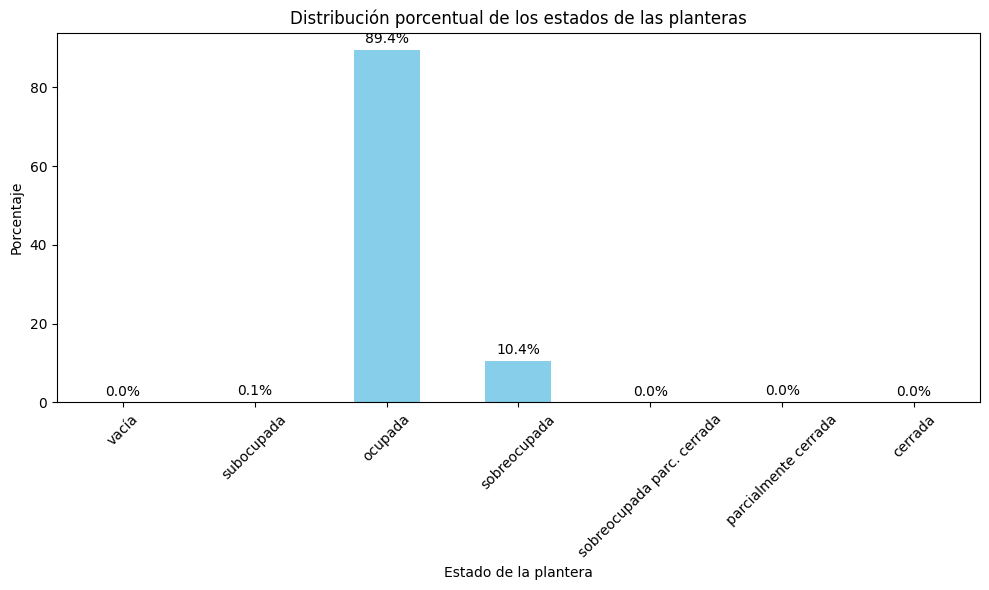

In [18]:
import matplotlib.pyplot as plt

dataset_hipotesis1 = dataset_limpio.copy()

# Contar las frecuencias de cada categoría en 'estado_plantera'
conteo_estado = dataset_hipotesis1['estado_plantera'].value_counts()

# Definimos el orden
desired_order = ['vacía', 'subocupada', 'ocupada', 'sobreocupada', 'sobreocupada parc. cerrada', 'parcialmente cerrada', 'cerrada']

# Reindexamos
conteo_estado = conteo_estado.reindex(desired_order)

# Calcular el total de planteras
total_planteras = conteo_estado.sum()

# Calcular los porcentajes
porcentajes = (conteo_estado / total_planteras) * 100

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = porcentajes.plot(kind='bar', color='skyblue')

# Añadir título y etiquetas
plt.title('Distribución porcentual de los estados de las planteras')
plt.xlabel('Estado de la plantera')
plt.ylabel('Porcentaje')

# Añadir los porcentajes encima de cada barra
for i, v in enumerate(porcentajes):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Segun los datos del censo 2019, el 89,4% de las planteras se encuentran ocupadas y un 10,4% sobreocupadas. Esto evidencia que existen pocas planteras disponibles para futuras plantaciones. En terminos practicos, los datos sugieren que la ciudad deberia planificar nuevas plantaciones o reemplazos para equilibrar el uso de las planteras y evitar la saturacion.

Hipotesis 2:

**Algunas especies dominan el arbolado urbano de Buenos Aires, causando alergia, como el plátano de sombra.**

Datos requeridos: nombre_cientifico

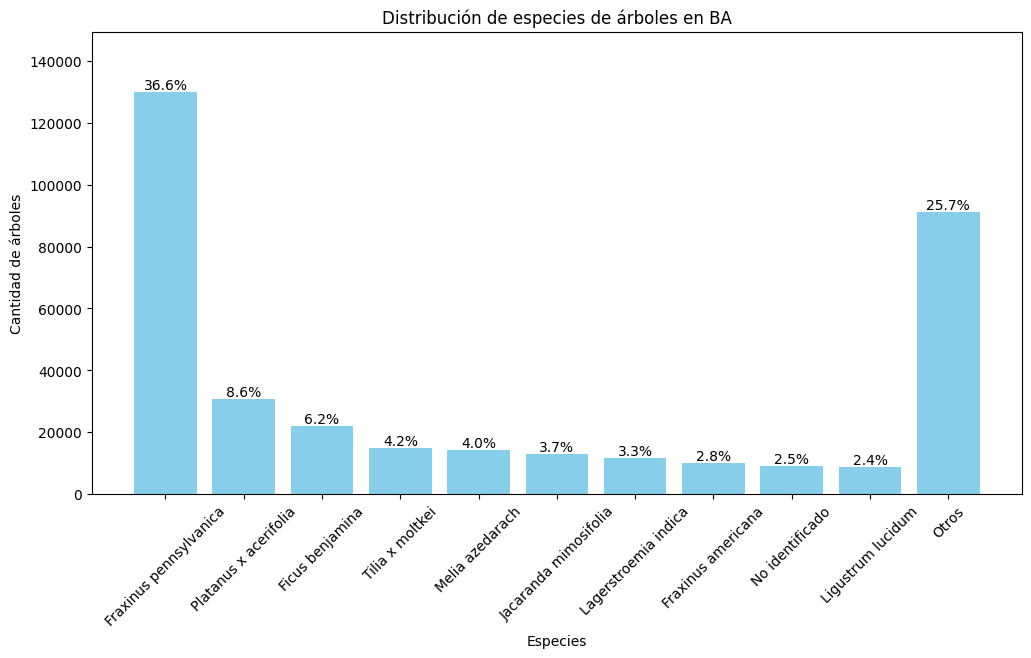

In [19]:
import matplotlib.pyplot as plt

# Copia del dataset limpio a otro
dataset_hipotesis2 = dataset_limpio.copy()
# Contar la cantidad de cada especie
conteo = dataset_hipotesis2['nombre_cientifico'].value_counts()

#Tomar las 10 especies más frecuentes
top10 = conteo[:10]

# Sumar el resto como "Otros"
otros = conteo[10:].sum()

# Crear un nuevo Series con top10 + Otros usando pd.concat
top10_y_otros = pd.concat([top10, pd.Series({'Otros': otros})])

# Convertir a porcentajes
top10_y_otros_pct = top10_y_otros / top10_y_otros.sum() * 100

total_arboles = top10_y_otros.sum()
# Crear gráfico de barras
fig, ax = plt.subplots(figsize=(12,6))
barras = ax.bar(top10_y_otros.index, top10_y_otros.values, color='skyblue')

# Añadir porcentaje encima de cada barra

for barra in barras:
    altura = barra.get_height()
    porcentaje = altura / total_arboles * 100
    ax.text(barra.get_x() + barra.get_width()/2, altura + 2, f'{porcentaje:.1f}%',
            ha='center', va='bottom', fontsize=10)

ax.set_ylabel('Cantidad de árboles')
ax.set_xlabel('Especies')
ax.set_title('Distribución de especies de árboles en BA')
plt.xticks(rotation=45)
plt.ylim(0, max(top10_y_otros.values)*1.15)
plt.show()

Los resultados obtenidos muestran que un 8,6% del total de arboles de la ciudad de buenos aires corresponden a la especie platanus x acerifolia, conformando el segundo grupo mas abundante en la ciudad. Con estos resultados podemos decir que el platanus es una especie abundante en la ciudad. Teniendo en cuenta los resultados, se sugiere la revisión y planificación de políticas de gestión del arbolado para mitigar el impacto en la salud de los ciudadanos alérgicos, ya que la gran presencia de Platanus x acerifolia en el arbolado urbano implica una alta exposición poblacional al polen alergénico que produce esta especie.

Hipotesis 3: Univariada

**La distribución del arbolado urbano en la Ciudad Autónoma de Buenos Aires no es equitativa entre comunas; algunas presentan una mayor concentración de árboles que otras.**

Datos requeridos: comuna

In [20]:
import geopandas as gpd

# Buscar el archivo .shp o .geojson
comunas_caba = gpd.read_file("comunas/comunas.shp" )

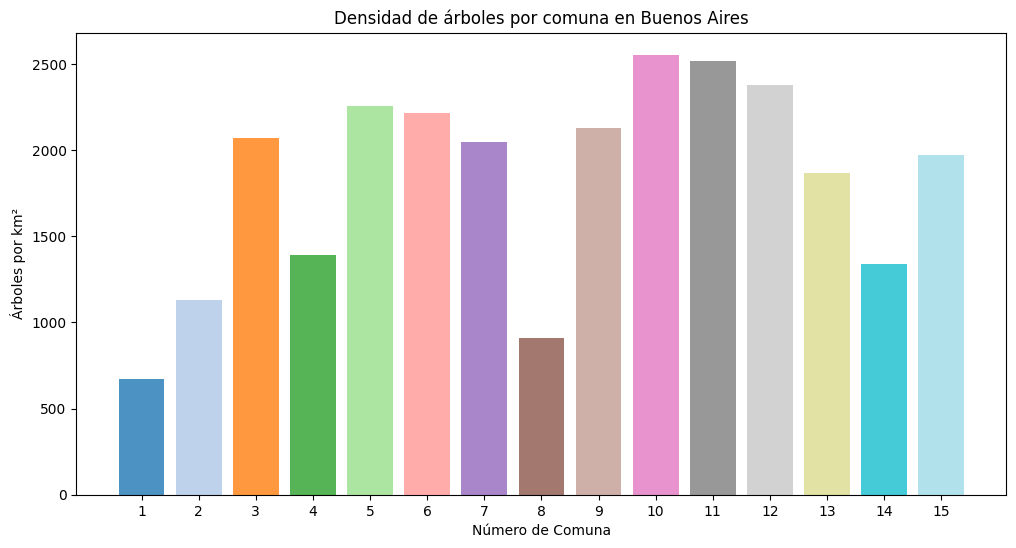

In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dataset_hipotesis3 = dataset_limpio.copy()

# Lista de superficie por comuna en km
superficies = [17.4, 6.1, 6.4, 21.6, 6.7, 6.8, 12.4, 21.9, 16.8, 12.7, 14.1, 15.6, 14.6, 15.8, 14.3]

# Total de km de superficie
total = 205.9

# Contar la cantidad de árboles por comuna
arboles_por_comuna = dataset_hipotesis3['comuna'].value_counts().sort_index()

# Crear un DataFrame con la superficie de cada comuna
df_superficie = pd.DataFrame({
    'comuna': sorted(dataset_hipotesis3['comuna'].unique()),  # asegurarse del mismo orden
    'superficie_km2': superficies
})

# Combinar ambos DataFrames
df_arboles = pd.DataFrame({
    'comuna': arboles_por_comuna.index,
    'cantidad_arboles': arboles_por_comuna.values
})

df_arboles = df_arboles.merge(df_superficie, on='comuna')

# Densidad de árboles
df_arboles['arboles_por_km2'] = df_arboles['cantidad_arboles'] / df_arboles['superficie_km2']

# Ver resultados
plt.figure(figsize=(12,6))

# Crear un color distinto para cada comuna
colores = plt.cm.tab20(np.linspace(0, 1, 15))

# Graficar barra por barra usando la densidad de árboles
for i, row in df_arboles.iterrows():
    plt.bar(row['comuna'], row['arboles_por_km2'], color=colores[i], alpha=0.8)

plt.xlabel("Número de Comuna")
plt.ylabel("Árboles por km²")
plt.title("Densidad de árboles por comuna en Buenos Aires")

# Forzar ticks del 1 al 15
plt.xticks(ticks=range(1,16), labels=range(1,16))
plt.show()

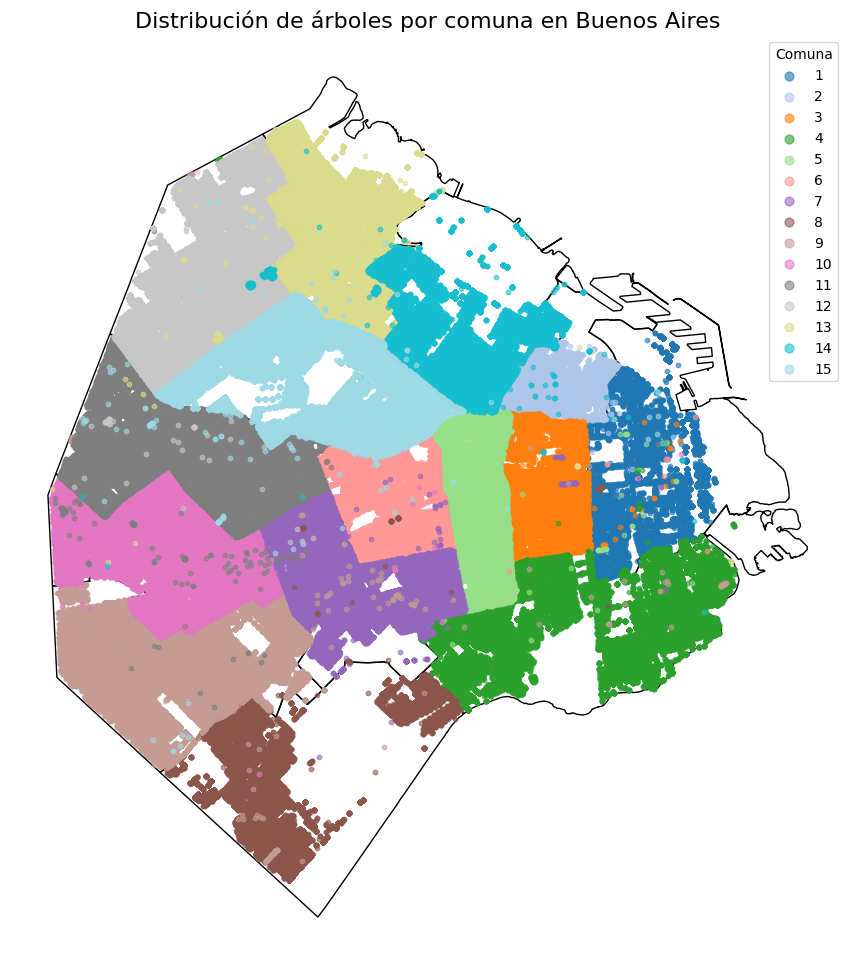

In [22]:

# Crear GeoDataFrame de los árboles
gdf_arboles = gpd.GeoDataFrame(dataset_hipotesis3, geometry=gpd.points_from_xy(dataset_hipotesis3['long'], dataset_hipotesis3['lat']))
gdf_arboles.set_crs(epsg=4326, inplace=True)  # Lat/Lon

# Asegurarse de que el shapefile de comunas y los puntos estén en la misma CRS
comunas_caba = comunas_caba.to_crs(epsg=4326)

# Colores por comuna
comunas = dataset_hipotesis3['comuna'].unique()
colores = plt.cm.tab20(np.linspace(0,1,len(comunas)))
color_dict = dict(zip(comunas, colores))

# Graficar mapa
fig, ax1 = plt.subplots(figsize=(12,12))
comunas_caba.plot(ax=ax1, facecolor="none", edgecolor="black", linewidth=1)

for comuna in comunas:
    sub_gdf = gdf_arboles[gdf_arboles['comuna'] == comuna]
    sub_gdf.plot(ax=ax1, markersize=10, color=color_dict[comuna], label=comuna, alpha=0.6)

ax1.set_title("Distribución de árboles por comuna en Buenos Aires", fontsize=16)
ax1.set_axis_off()
ax1.legend(markerscale=2, fontsize=10, title="Comuna")
plt.show()


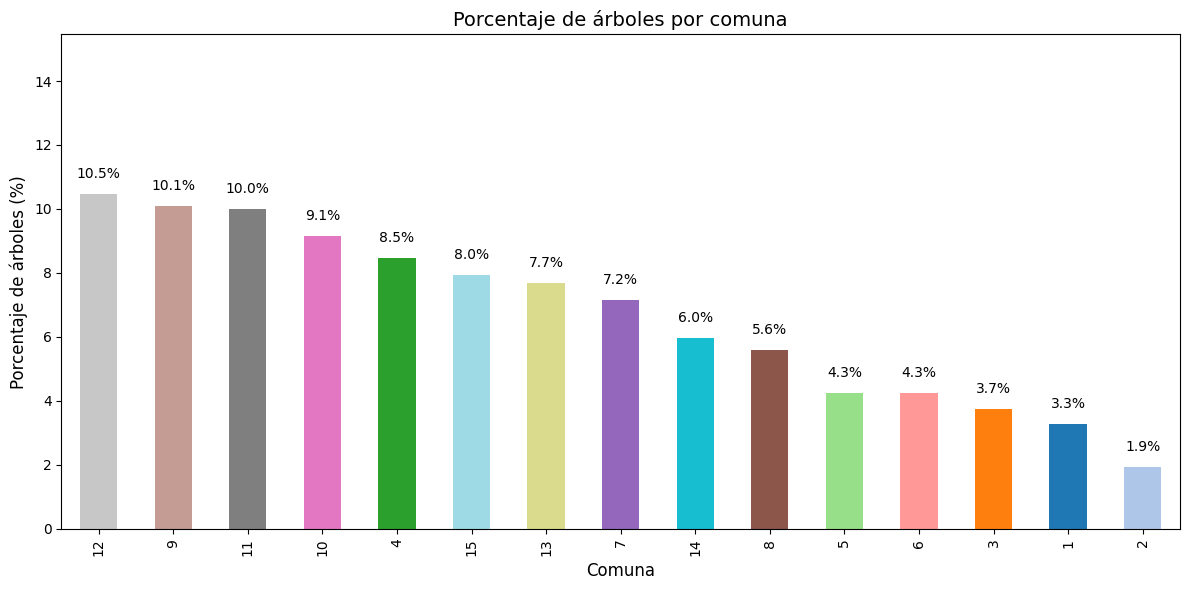

In [23]:
# Calcular porcentaje de árboles por comuna
arboles_por_comuna = dataset_hipotesis3['comuna'].value_counts()
arboles_por_comuna_pct = arboles_por_comuna / arboles_por_comuna.sum() * 100
arboles_por_comuna_pct = arboles_por_comuna_pct.sort_values(ascending=False)

# Graficar gráfico de barras
fig, ax2 = plt.subplots(figsize=(12,6))
arboles_por_comuna_pct.plot(kind='bar', ax=ax2, color=[color_dict[c] for c in arboles_por_comuna_pct.index])

ax2.set_ylabel("Porcentaje de árboles (%)", fontsize=12)
ax2.set_xlabel("Comuna", fontsize=12)
ax2.set_title("Porcentaje de árboles por comuna", fontsize=14)
ax2.set_ylim(0, arboles_por_comuna_pct.max()+5)

# Mostrar valores encima de cada barra
for i, v in enumerate(arboles_por_comuna_pct):
    ax2.text(i, v+0.5, f"{v:.1f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


**Conclusión:**

Con este analisis que hemos realizado, nos dimos que puede haber un % de error en nuestros resultados relacionados a la comuna debido a que hay arboles que dicen ser de tal comuna pero segun su latitud y longitud, estan en otra.
El grafico de barras confirma que la distribución del arbolado urbano en Buenos Aires presenta un desbalance entre comunas, por ejemplo, la comuna 1 y 2 son las mas bajas reprensentando un 5.2% del arbolado de la ciudad. Mientras que la comuna 12 presenta un 10.5% del total del arbolado. Podemos concluir en que esas comunas necesitan un proyecto de forestación.

Hipotesis 4: Bivariada

**Algunas comunas tienen desbalance, con pocas especies “eficientes” frente a especies de menor rendimiento ambiental.**

Datos requeridos: nombre_cientifico, comuna.

Eucalipto, Jacaranda mimosifolia, Melia azedarach, Ulmus spp., Quercus spp.

Conclusión: Sugerir reforestaciones focalizadas por comuna.

Coeficiente de correlación: 0.506


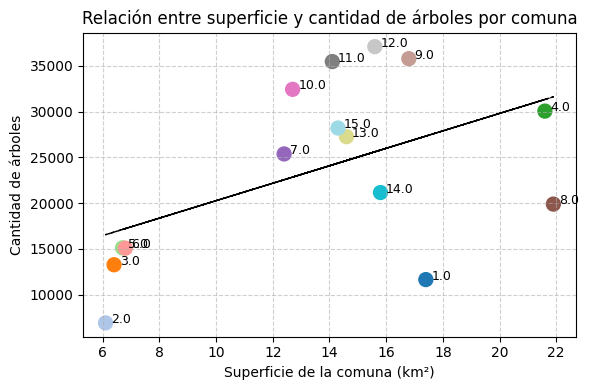

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

dataset_hipotesis4 = dataset_limpio.copy()

# Lista de superficie por comuna en km
superficies = [17.4, 6.1, 6.4, 21.6, 6.7, 6.8, 12.4, 21.9, 16.8, 12.7, 14.1, 15.6, 14.6, 15.8, 14.3]

# Total de km de superficie
total = 205.9

# Crear DataFrame con comunas y superficies
df_superficie = pd.DataFrame({
    'comuna': range(1, 16),
    'superficie_km2': superficies
})


# Contar cantidad de árboles por comuna
conteo_arboles = dataset_hipotesis4['comuna'].value_counts().sort_index().reset_index()
conteo_arboles.columns = ['comuna', 'cantidad_arboles']
conteo_arboles['comuna'] = conteo_arboles['comuna'].astype(int)

# Unir los dos DataFrames
df_resultado = pd.merge(df_superficie, conteo_arboles, on='comuna')

# Colores de las comunas
colores = [color_dict[c] for c in df_resultado['comuna']]

# --- Calcular correlación ---
r, _ = pearsonr(df_resultado['superficie_km2'], df_resultado['cantidad_arboles'])

print(f"Coeficiente de correlación: {r:.3f}")

# --- Graficar ---
plt.figure(figsize=(6,4))
plt.scatter(df_resultado['superficie_km2'], df_resultado['cantidad_arboles'], color=colores, s=100)

# Línea de tendencia
m, b = np.polyfit(df_resultado['superficie_km2'], df_resultado['cantidad_arboles'], 1)
plt.plot(df_resultado['superficie_km2'], m*df_resultado['superficie_km2'] + b, color='black', linestyle='--', linewidth=1)

# Etiquetas de comunas
for i, row in df_resultado.iterrows():
    plt.text(row['superficie_km2'] + 0.2, row['cantidad_arboles'], str(row['comuna']), fontsize=9)

plt.title('Relación entre superficie y cantidad de árboles por comuna')
plt.xlabel('Superficie de la comuna (km²)')
plt.ylabel('Cantidad de árboles')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Hay una clara tendencia que a cuanto mas superficie de la comuna, mayor cantidad de arboles.

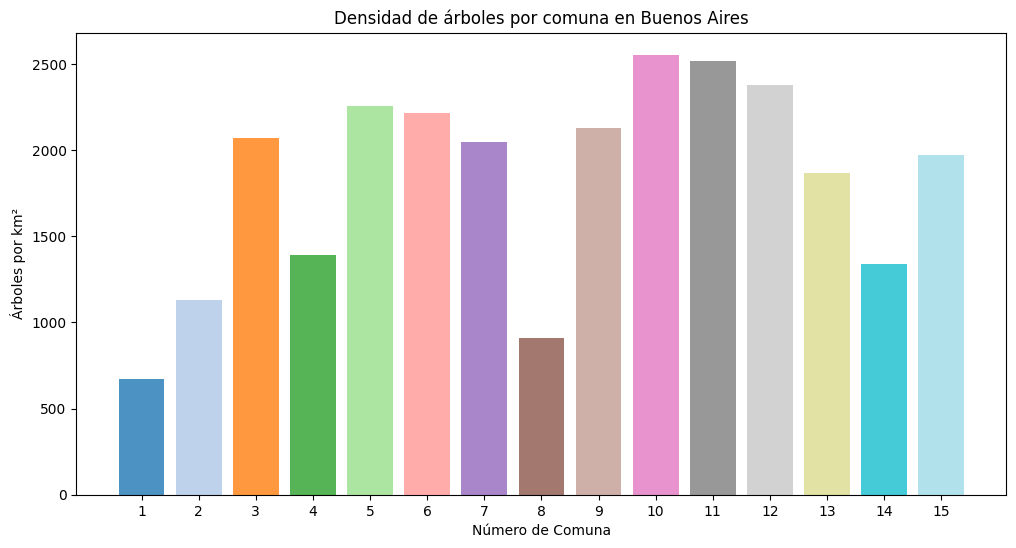

In [25]:

# Contar la cantidad de árboles por comuna
arboles_por_comuna = dataset_hipotesis4['comuna'].value_counts().sort_index()


# Combinar ambos DataFrames
df_arboles = pd.DataFrame({
    'comuna': arboles_por_comuna.index,
    'cantidad_arboles': arboles_por_comuna.values
})

df_arboles = df_arboles.merge(df_superficie, on='comuna')

# Densidad de árboles
df_arboles['arboles_por_km2'] = df_arboles['cantidad_arboles'] / df_arboles['superficie_km2']

# Ver resultados
plt.figure(figsize=(12,6))

# Crear un color distinto para cada comuna
colores = plt.cm.tab20(np.linspace(0, 1, 15))

# Graficar barra por barra usando la densidad de árboles
for i, row in df_arboles.iterrows():
    plt.bar(row['comuna'], row['arboles_por_km2'], color=colores[i], alpha=0.8)

plt.xlabel("Número de Comuna")
plt.ylabel("Árboles por km²")
plt.title("Densidad de árboles por comuna en Buenos Aires")

# Forzar ticks del 1 al 15
plt.xticks(ticks=range(1,16), labels=range(1,16))
plt.show()

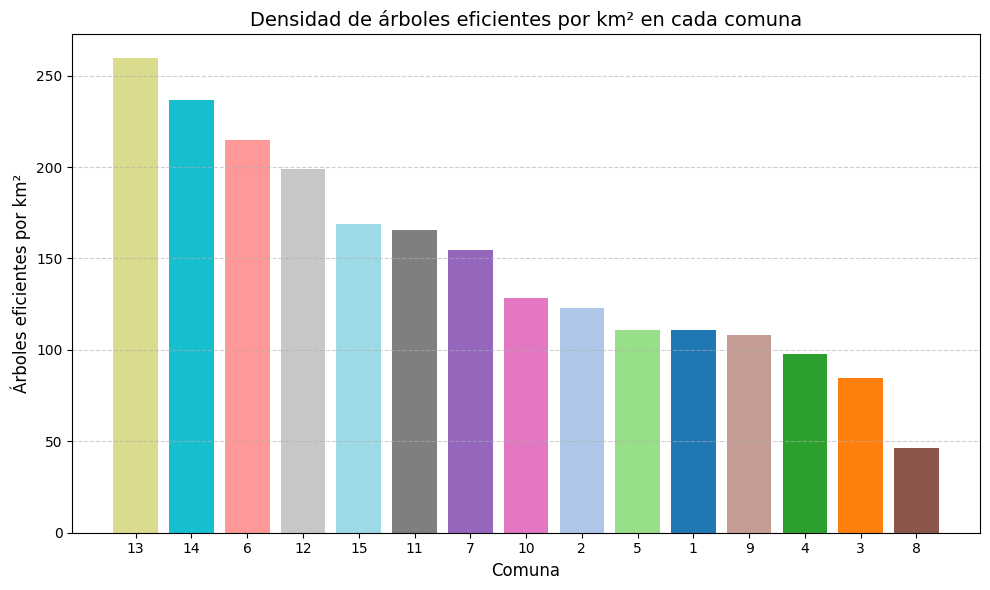

In [26]:
# --- Listas de especies eficientes ---
eficientes = [
    'Eucalyptus grandis', 'Eucalyptus camaldulensis', 'Eucalyptus globulus',
    'Jacaranda mimosifolia', 'Quercus robur', 'Quercus ilex', 'Quercus palustris',
    'Tipuana tipu', 'Liquidambar styraciflua', 'Ceiba speciosa'
]

# --- Clasificar especies ---
def clasificar_especie(nombre):
    if pd.isna(nombre):
        return 'otra'
    for e in eficientes:
        if e.lower() in nombre.lower():
            return 'eficiente'
    return 'otra'

dataset_hipotesis4['categoria'] = dataset_hipotesis4['nombre_cientifico'].apply(clasificar_especie)

# --- Contar árboles totales y eficientes por comuna ---
conteo = dataset_hipotesis4.groupby(['comuna', 'categoria']).size().unstack(fill_value=0).reset_index()

# Asegurar que la columna 'eficiente' exista
if 'eficiente' not in conteo.columns:
    conteo['eficiente'] = 0

# Unir superficies
df_resultado = pd.merge(df_superficie, conteo, on='comuna', how='left')

# --- Calcular densidad de árboles eficientes por km² ---
df_resultado['eficientes_por_km2'] = df_resultado['eficiente'] / df_resultado['superficie_km2']

# --- Ordenar por densidad de mayor a menor ---
df_ordenado = df_resultado.sort_values('eficientes_por_km2', ascending=False)

# --- Graficar con colores consistentes ---
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(
    df_ordenado['comuna'].astype(str),
    df_ordenado['eficientes_por_km2'],
    color=[color_dict[c] for c in df_ordenado['comuna']]
)

ax.set_title('Densidad de árboles eficientes por km² en cada comuna', fontsize=14)
ax.set_xlabel('Comuna', fontsize=12)
ax.set_ylabel('Árboles eficientes por km²', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


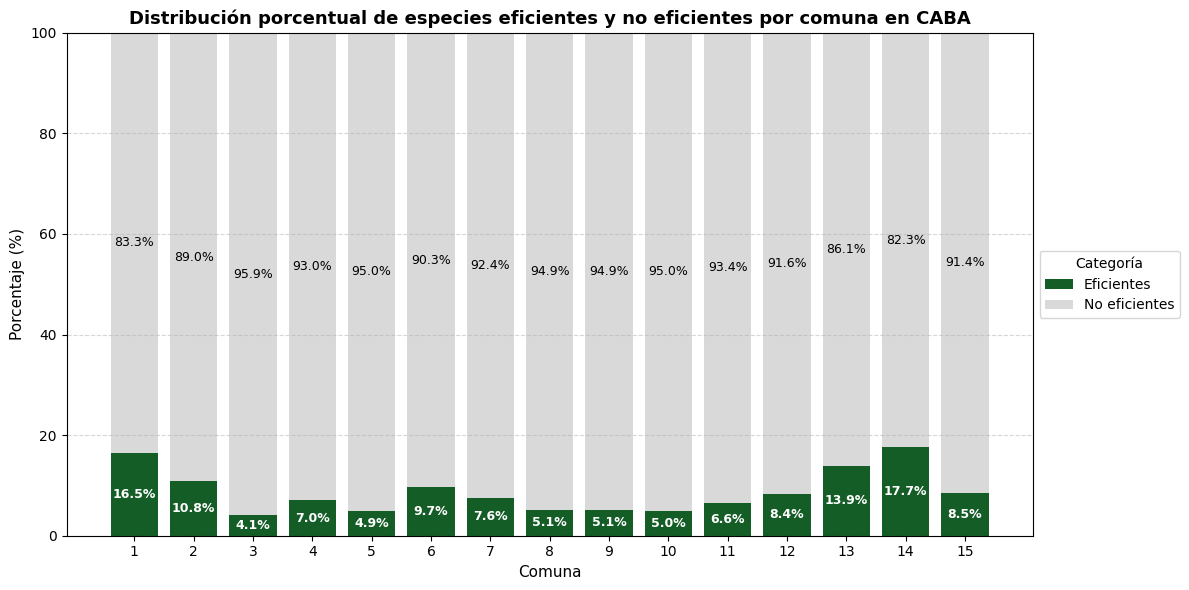

In [27]:
# Agrupar por comuna y categoría
conteo = dataset_hipotesis4.groupby(['comuna', 'categoria']).size().unstack(fill_value=0)

# Asegurar que estén todas las comunas del 1 al 15
conteo = conteo.reindex(range(1, 16), fill_value=0)

# Calcular proporciones en porcentaje
conteo['eficiente_%'] = conteo['eficiente'] / conteo.sum(axis=1).replace(0, 1) * 100
conteo['no_eficiente_%'] = conteo['otra'] / conteo.sum(axis=1).replace(0, 1) * 100

# Graficar
plt.figure(figsize=(12,6))
bars_si = plt.bar(conteo.index, conteo['eficiente_%'], color='#155D27', label='Eficientes')  # verde más oscuro
bars_no = plt.bar(conteo.index, conteo['no_eficiente_%'], bottom=conteo['eficiente_%'], color='#D9D9D9', label='No eficientes')

# Etiquetas y formato
plt.title('Distribución porcentual de especies eficientes y no eficientes por comuna en CABA', fontsize=13, fontweight='bold')
plt.xlabel('Comuna', fontsize=11)
plt.ylabel('Porcentaje (%)', fontsize=11)
plt.ylim(0, 100)
plt.xticks(range(1, 16))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Categoría', loc='center left', bbox_to_anchor=(1, 0.5))

# Mostrar porcentajes dentro de cada barra (centrados correctamente)
for comuna in conteo.index:
    if conteo.loc[comuna, 'eficiente_%'] > 0 or conteo.loc[comuna, 'no_eficiente_%'] > 0:
        # Porcentaje de eficientes (parte verde)
        plt.text(comuna, conteo.loc[comuna, 'eficiente_%'] / 2,
                 f"{conteo.loc[comuna, 'eficiente_%']:.1f}%",
                 ha='center', va='center', fontsize=9, color='white', fontweight='bold')
        # Porcentaje de no eficientes (parte gris)
        plt.text(comuna, conteo.loc[comuna, 'eficiente_%'] + conteo.loc[comuna, 'no_eficiente_%'] / 2,
                 f"{conteo.loc[comuna, 'no_eficiente_%']:.1f}%",
                 ha='center', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

**Primero, formulamos las hipotesis estadisticas:**

Hipotesis nula: No hay diferencia en la proporción de especies eficientes entre comunas.

Hipotesis alternativa: Sí hay diferencia, es decir, algunas comunas tienen más especies eficientes que otras.

**Segundo: Test de independencia de Chi-cuadrado χ²**

Sirve para verificar si hay asociación entre dos variables categóricas, es decir, si la proporción de especies eficientes depende de la comuna.

**Verificamos que se cumplan los supuestos:**
    - Datos Categoricos                                                                                                 
    - Independencia de las variables                                                                                    
    - Frecuencias esperadas: Cada celda en la tabla de contingencia debe tener una frecuencia esperada de al menos 5   

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# Creamos la tabla de contingencia
tabla = pd.crosstab(dataset_hipotesis4["comuna"], dataset_hipotesis4["categoria"])

# Hacemos el test de Chi-cuadrado de independencia
chi2, p, dof, expected = chi2_contingency(tabla)

# Revisar frecuencias esperadas
expected_df = pd.DataFrame(expected, index=tabla.index, columns=tabla.columns)
print(expected_df)


categoria    eficiente          otra
comuna                              
1           961.201303  10685.798697
2           570.267108   6339.732892
3          1094.896341  12172.103659
4          2481.280877  27584.719123
5          1247.160135  13864.839865
6          1244.766829  13838.233171
7          2094.720656  23287.279344
8          1642.138193  18255.861807
9          2954.165180  32841.834820
10         2677.614517  29767.385483
11         2927.921339  32550.078661
12         3062.689238  34048.310762
13         2250.285561  25016.714439
14         1746.453334  19415.546666
15         2328.439389  25885.560611


Al saber que son datos categoricos, hay independecia de las variables ya que cada observacion es de un arbol unico y al ver que las celdas de la tabla de contingencia son numeros mayores que 5, podemos concluir que se puede realizar el test de chi cuadrado.

In [32]:
print(f"Chi-cuadrado: {chi2:.3f}")
print(f"Grados de libertad: {dof}")
print(f"p-valor: {p:.5f}")


Chi-cuadrado: 6703.389
Grados de libertad: 14
p-valor: 0.00000


Al ver que p < 0.05, rechazamos la hipotesis nula y concluimos que hay diferencias significativas entre la cantidad de especies eficientes por comunas.

**Conclusion de hipotesis:**

Se ve que claramente hay un desbalance en cuanto a la cantidad de arboles que son especies eficientes en cuanto a la toma de CO2. Con los graficos podemos evidenciar que algunas comunas tienen una proporcion de arboles eficientes por km^2 mucho mayor que otras, por ejemplo, la comuna 1 (Puerto Madero) tiene un 16.5% de arboles eficientes mientras que la comuna 9 tiene un 5.0% de arboles eficientes. Sin embargo, la comuna 1 tiene una alta proporcion debido a que tiene una menor cantidad de arboles por km2. Lo que concluimos es que se necesita un plan de forestacion de arboles eficientes en la mayoria de las comunas para llegar al menos a una proporcion del 40% de arboles eficientes por comuna. Ademas, habiendo hecho el test de chi cuadrado, vemos como se rechaza nuestra hipotesis nula que dice que no hay diferencia en la proporción de especies eficientes entre comunas.

**Hipotesis 5: Bivariada**

**En comunas con mayor proporción de especies dominantes (menos diversidad) el diámetro promedio de los árboles es menor que en comunas con mayor diversidad de especies.**

Datos requeridos: nombre_cientifico, diametro_altura_pecho.

Resultado: Ver si la dominancia de pocas especies afecta el crecimiento (y por tanto el valor ambiental) de la masa arbórea.

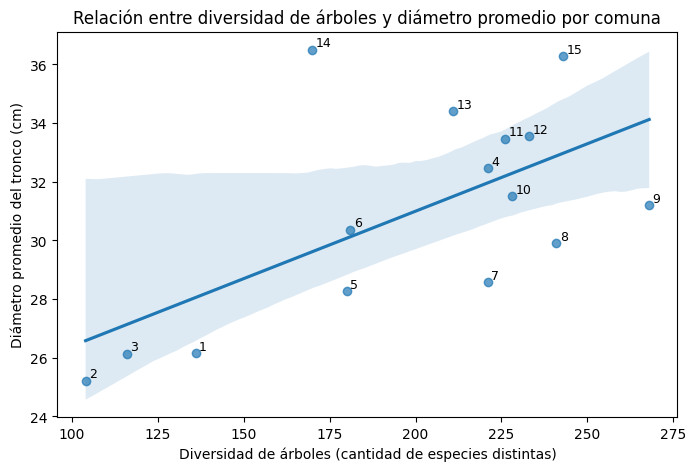

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Copia del dataset limpio
dataset_hipotesis5 = dataset_limpio.copy()

# Agrupación por comuna: diversidad (cantidad de especies) y diámetro promedio
df_comuna = dataset_hipotesis5.groupby('comuna').agg({
    'nombre_cientifico': pd.Series.nunique,  # cantidad de especies distintas
    'diametro_altura_pecho': 'mean'          # diámetro promedio
}).reset_index()

# Renombramos la columna para claridad
df_comuna.rename(columns={'nombre_cientifico': 'diversidad_de_arboles'}, inplace=True)

# --- Exploración gráfica ---
plt.figure(figsize=(8,5))
sns.regplot(data=df_comuna, x='diversidad_de_arboles', y='diametro_altura_pecho', scatter_kws={'alpha':0.7})

# Etiquetas de comunas sobre los puntos
for i, row in df_comuna.iterrows():
    plt.text(row['diversidad_de_arboles']+1, row['diametro_altura_pecho']+0.1, str(int(row['comuna'])), fontsize=9)

plt.title('Relación entre diversidad de árboles y diámetro promedio por comuna')
plt.xlabel('Diversidad de árboles (cantidad de especies distintas)')
plt.ylabel('Diámetro promedio del tronco (cm)')
plt.show()



In [ ]:
import statsmodels.api as sm
X = sm.add_constant(df_comuna['diversidad_de_arboles'])
y = df_comuna['diametro_altura_pecho']
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                              OLS Regression Results                             
Dep. Variable:     diametro_altura_pecho   R-squared:                       0.395
Model:                               OLS   Adj. R-squared:                  0.349
Method:                    Least Squares   F-statistic:                     8.502
Date:                   Thu, 06 Nov 2025   Prob (F-statistic):             0.0120
Time:                           14:54:26   Log-Likelihood:                -36.154
No. Observations:                     15   AIC:                             76.31
Df Residuals:                         13   BIC:                             77.72
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


Esto sugiere que la diversidad arbórea urbana contribuye al desarrollo más saludable de los árboles, reflejado en un mayor diámetro.

Conclusión

Los resultados muestran una relación positiva entre la diversidad de especies de árboles y el diámetro promedio del tronco por comuna.
Esto sugiere que las comunas con mayor diversidad arbórea tienden a tener árboles más desarrollados.
En contraste, comunas con menor diversidad presentan árboles más pequeños, lo que podría reflejar monocultivos urbanos o menor inversión en biodiversidad.

En términos ambientales, una mayor diversidad podría favorecer la resiliencia y el crecimiento saludable del arbolado urbano, aportando mayor calidad ecosistémica.

**Hipotesis 6: Multivariada**

**1. Arboles de mayor tamaño concentran más en ciertas comunas (zonas residenciales con veredas grandes) que en zonas más densas.**

Datos requeridos: diametro_altura_pecho, altura_arbol, ancho_acera, comuna.

Comuna 12 → Saavedra, Villa Urquiza, Villa Pueyrredón, Coghlan

Comuna 13 → Núñez, Belgrano, Colegiales

Comuna 14 → Palermo

Resultado: descubrir desigualdades en “calidad de arbolado”.

In [ ]:
dataset_hipotesis6 = dataset_limpio.copy()
""" Aca hacemos la correlacion entre ancho_acera, altura_arbol y diametro_altura_pecho """
dataset_hipotesis6[['ancho_acera', 'altura_arbol', 'diametro_altura_pecho']].corr()


,ancho_acera,altura_arbol,diametro_altura_pecho
ancho_acera,1.000000,0.043167,0.121031
altura_arbol,0.043167,1.000000,0.654335
diametro_altura_pecho,0.121031,0.654335,1.000000


In [ ]:
""" Aca tengo las medias de diametro a la altura del pecho y altura del arbol por comuna """
muestra = dataset_hipotesis6.groupby('comuna')[['diametro_altura_pecho', 'altura_arbol', 'ancho_acera']].mean().sort_values(by='diametro_altura_pecho', ascending=False)
muestra

,diametro_altura_pecho,altura_arbol,ancho_acera
comuna,,,
14,36.501678,11.910008,3.778135
15,36.273770,9.844532,3.890193
13,34.398114,10.568245,3.770674
12,33.558650,9.083204,3.938962
11,33.470970,8.993668,3.932929
4,32.468601,8.922303,3.486174
10,31.502036,7.980177,3.795788
9,31.205735,7.369996,4.059196
6,30.364191,10.166778,3.392245


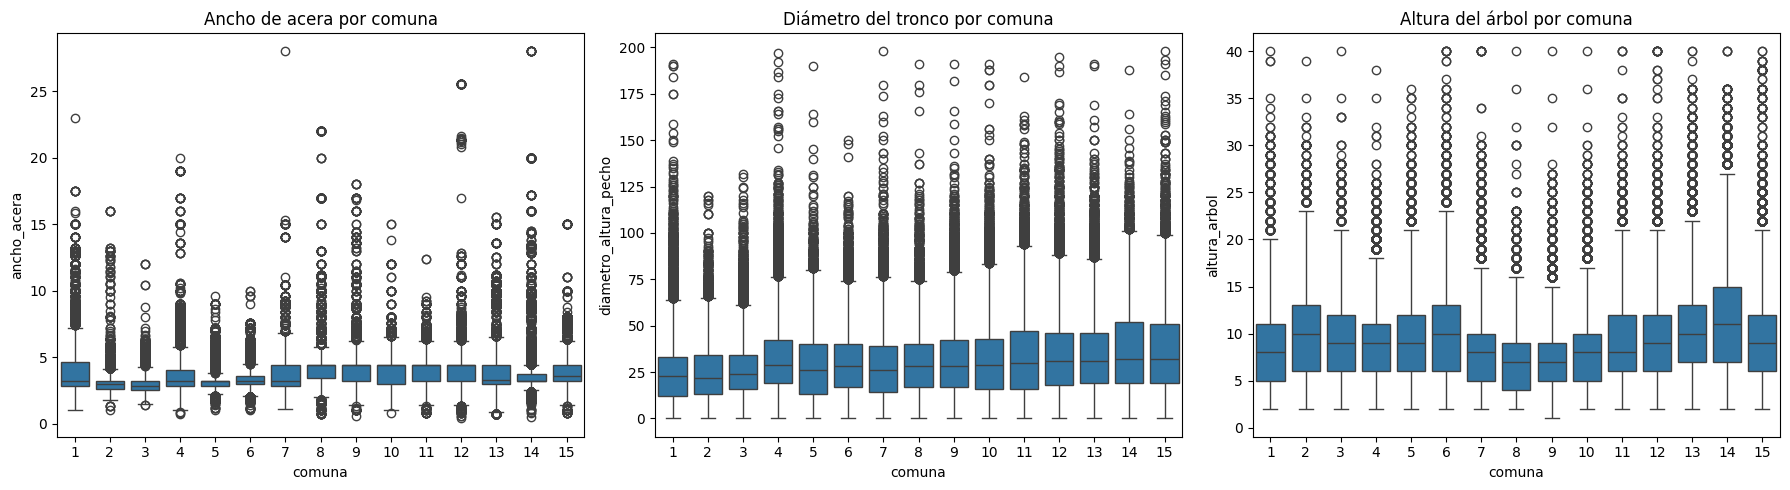

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(x='comuna', y='ancho_acera', data=dataset_hipotesis6, ax=axes[0])
axes[0].set_title('Ancho de acera por comuna')

sns.boxplot(x='comuna', y='diametro_altura_pecho', data=dataset_hipotesis6, ax=axes[1])
axes[1].set_title('Diámetro del tronco por comuna')

sns.boxplot(x='comuna', y='altura_arbol', data=dataset_hipotesis6, ax=axes[2])
axes[2].set_title('Altura del árbol por comuna')

plt.tight_layout()
plt.show()


In [ ]:
import statsmodels.formula.api as smf

# modelo donde el diámetro depende de ancho de acera y comuna
""" Si el coeficiente de ancho_acera es positivo y significativo (p < 0.05), muestra que aceras más anchas favorecen árboles más grandes,
incluso considerando las diferencias entre comunas. """
modelo_diametro_ancho = smf.ols('diametro_altura_pecho ~ ancho_acera + C(comuna)', data=dataset_hipotesis6).fit()
print(modelo_diametro_ancho.summary())


                              OLS Regression Results                             
Dep. Variable:     diametro_altura_pecho   R-squared:                       0.032
Model:                               OLS   Adj. R-squared:                  0.032
Method:                    Least Squares   F-statistic:                     778.7
Date:                   Thu, 06 Nov 2025   Prob (F-statistic):               0.00
Time:                           14:54:30   Log-Likelihood:            -1.5693e+06
No. Observations:                 352409   AIC:                         3.139e+06
Df Residuals:                     352393   BIC:                         3.139e+06
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept   

In [ ]:
import statsmodels.formula.api as smf

# modelo donde el diámetro depende de ancho de acera y comuna
""" Si el coeficiente de ancho_acera es positivo y significativo (p < 0.05), muestra que aceras más anchas favorecen árboles más grandes,
incluso considerando las diferencias entre comunas. """
modelo_altura_ancho = smf.ols('altura_arbol ~ ancho_acera + C(comuna)', data=dataset_hipotesis6).fit()
print(modelo_altura_ancho.summary())


                            OLS Regression Results                            
Dep. Variable:           altura_arbol   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     1740.
Date:                Thu, 06 Nov 2025   Prob (F-statistic):               0.00
Time:                        14:54:32   Log-Likelihood:            -1.0356e+06
No. Observations:              348832   AIC:                         2.071e+06
Df Residuals:                  348816   BIC:                         2.071e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.4743      0.052    1

**Conclusión**

Los resultados nos muestran que los arboles de mayor altura y diametro no son los que estan en las veredas mas anchas. Sin embargo, si logramos identificar la existencia de una correlacion entre la altura y el diametro, ya que los arboles mas altos son los arboles mas anchos a la vez. Para concluir, podemos validar la hipotesis de que las comunas mencionadas (12, 13 y 14), son aquellas que cumplen de a mayor altura, mayor diametro, obteniendo una mejor calidad de arbolado.